In [1]:
import warnings
warnings.filterwarnings("ignore", message="A NumPy version .* is required for this version of SciPy")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
# Set the main path to the dataset
main_path = '/kaggle/input/chest-xray-pneumonia/chest_xray'

**How to load and preprocess the dataset for Pneumonia detection using CNNs?**

In [3]:
# Question 1: How to load and preprocess the dataset for Pneumonia detection using CNNs?
# Loading and preprocessing the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    main_path + '/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    main_path + '/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**How to create a CNN model for Pneumonia detection?**

In [4]:
# Question 2: How to create a CNN model for Pneumonia detection?
# Creating a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

**How to train the CNN model on the Pneumonia detection dataset?**

In [5]:
# Question 3: How to train the CNN model on the Pneumonia detection dataset?
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
163/163 [==============================] - 91s 489ms/step - loss: 0.3277 - accuracy: 0.8593 - val_loss: 0.7030 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 46s 280ms/step - loss: 0.1161 - accuracy: 0.9580 - val_loss: 0.7528 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 44s 267ms/step - loss: 0.0927 - accuracy: 0.9657 - val_loss: 0.5778 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 43s 265ms/step - loss: 0.0774 - accuracy: 0.9701 - val_loss: 0.4745 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 43s 263ms/step - loss: 0.0683 - accuracy: 0.9764 - val_loss: 0.6182 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 43s 266ms/step - loss: 0.0622 - accuracy: 0.9778 - val_loss: 0.2704 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 45s 276ms/step - loss: 0.0692 - accuracy: 0.9757 - val_loss: 0.2019 - val_ac

**How to evaluate the performance of the trained CNN model on the test set?**

In [6]:
# Question 4: How to evaluate the performance of the trained CNN model on the test set?
# Evaluating the model on the test set
test_generator = test_datagen.flow_from_directory(
    main_path + '/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

eval_result = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {eval_result[1]*100:.2f}%")

Found 624 images belonging to 2 classes.
20/20 [==============================] - 7s 340ms/step - loss: 0.9875 - accuracy: 0.7821
Test Accuracy: 78.21%


**How to make predictions using the trained CNN model?**

In [7]:
# Question 5: How to make predictions using the trained CNN model?
# Making predictions on a sample image
sample_image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg'
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(150, 150))
sample_image_array = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image_array = tf.expand_dims(sample_image_array, 0)  # Add batch dimension

predictions = model.predict(sample_image_array)
predicted_class = "Pneumonia" if predictions[0][0] > 0.5 else "Normal"
print(f"Prediction: {predicted_class} (Probability: {predictions[0][0]*100:.2f}%)")

1/1 [==============================] - 0s 228ms/step
Prediction: Pneumonia (Probability: 100.00%)


**How to visualize the training process (learning curves)?**

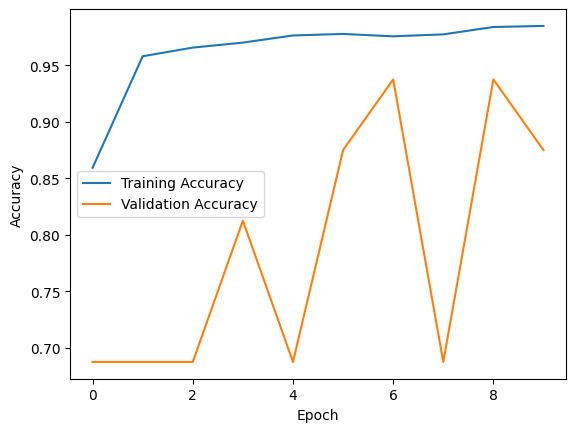

In [8]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Plotting the training and validation loss**

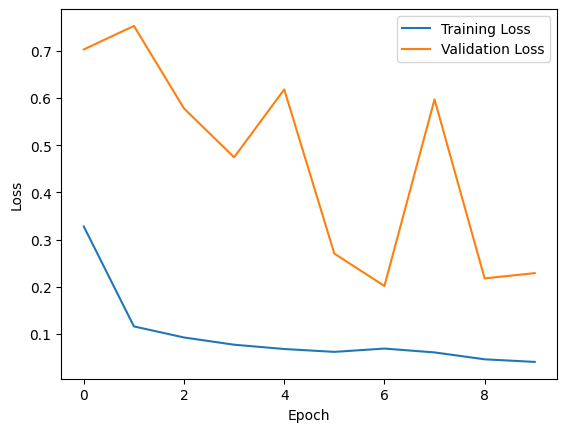

In [9]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**How to save the trained CNN model for future use?**

In [10]:
# Question 7: How to save the trained CNN model for future use?
# Saving the model
model.save('/path/to/save/model')

**How to load a pre-trained CNN model for inference?**

In [11]:
# Question 8: How to load a pre-trained CNN model for inference?
# Loading a pre-trained model
loaded_model = tf.keras.models.load_model('/path/to/save/model')

**How to perform inference using the loaded model?**

In [12]:
# Question 9: How to perform inference using the loaded model?
# Performing inference on a new sample image using the loaded model
new_sample_image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg'
new_sample_image = tf.keras.preprocessing.image.load_img(new_sample_image_path, target_size=(150, 150))
new_sample_image_array = tf.keras.preprocessing.image.img_to_array(new_sample_image)
new_sample_image_array = tf.expand_dims(new_sample_image_array, 0)  # Add batch dimension

new_predictions = loaded_model.predict(new_sample_image_array)
new_predicted_class = "Pneumonia" if new_predictions[0][0] > 0.5 else "Normal"
print(f"Prediction using loaded model: {new_predicted_class} (Probability: {new_predictions[0][0]*100:.2f}%)")

1/1 [==============================] - 0s 77ms/step
Prediction using loaded model: Pneumonia (Probability: 100.00%)


In [13]:
# Importing necessary libraries for EDA
import os
import seaborn as sns
import matplotlib.pyplot as plt

**What is the distribution of classes in the training set?**

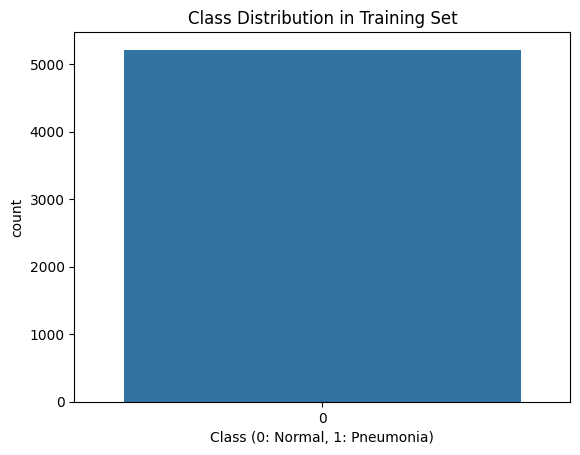

In [14]:
# Class distribution in the training set
train_class_distribution = train_generator.classes
sns.countplot(train_class_distribution)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class (0: Normal, 1: Pneumonia)')
plt.show()

**What is the distribution of classes in the validation set?**

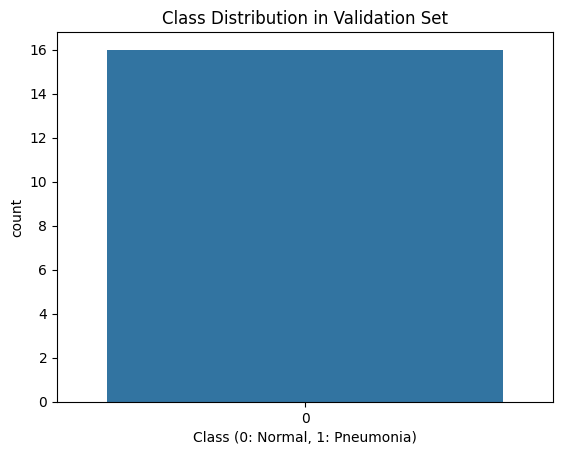

In [15]:
# Class distribution in the validation set
validation_class_distribution = validation_generator.classes
sns.countplot(validation_class_distribution)
plt.title('Class Distribution in Validation Set')
plt.xlabel('Class (0: Normal, 1: Pneumonia)')
plt.show()

**What is the distribution of classes in the test set?**

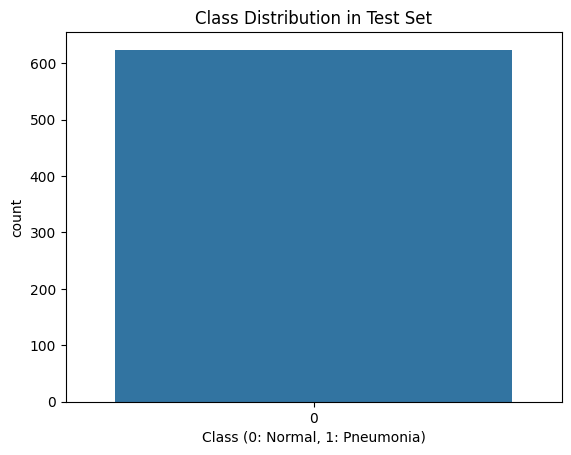

In [16]:
# Class distribution in the test set
test_class_distribution = test_generator.classes
sns.countplot(test_class_distribution)
plt.title('Class Distribution in Test Set')
plt.xlabel('Class (0: Normal, 1: Pneumonia)')
plt.show()

**How to calculate and visualize the confusion matrix?**

20/20 [==============================] - 5s 227ms/step


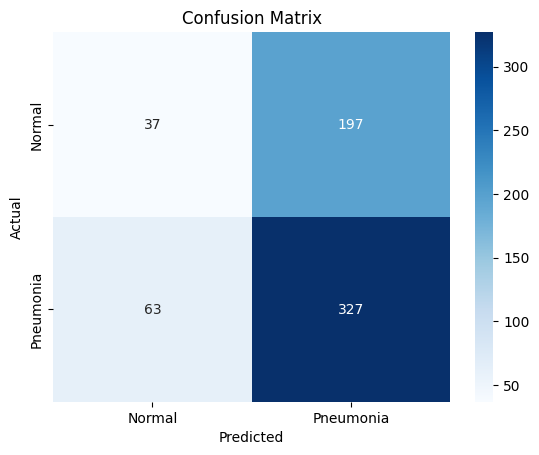

In [17]:
# Classifying images in the test set
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Question 10a: How to calculate and visualize the confusion matrix?
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculating confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, predicted_classes)

# Plotting confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**How to generate a classification report?**

In [18]:
class_report = classification_report(test_generator.classes, predicted_classes, target_names=['Normal', 'Pneumonia'])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Normal       0.37      0.16      0.22       234
   Pneumonia       0.62      0.84      0.72       390

    accuracy                           0.58       624
   macro avg       0.50      0.50      0.47       624
weighted avg       0.53      0.58      0.53       624



**What is the distribution of classes in the entire dataset?**

**How to visualize correctly and incorrectly classified images from the test set?**

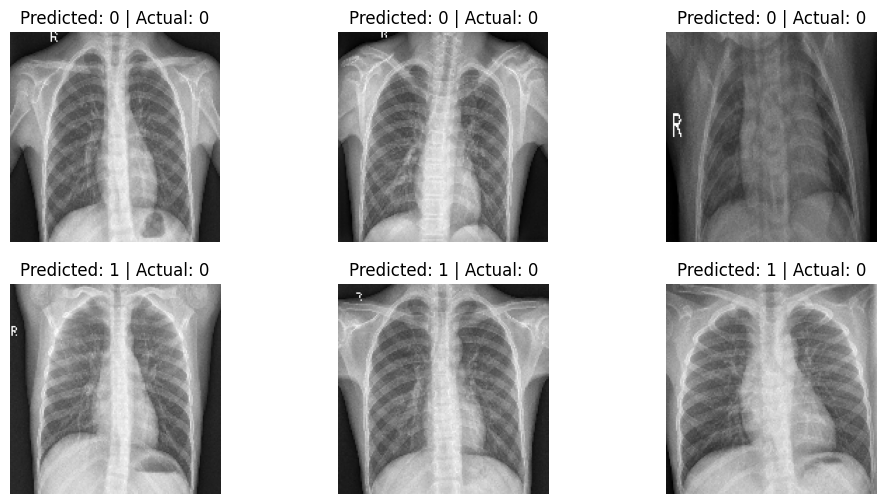

In [19]:
# Question 12a: Visualizing correctly classified images
correctly_classified_indices = [i for i, (true_class, pred_class) in enumerate(zip(test_generator.classes, predicted_classes)) if true_class == pred_class][:3]

plt.figure(figsize=(12, 6))
for i, index in enumerate(correctly_classified_indices):
    img_path = test_generator.filepaths[index]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_classes[index]} | Actual: {test_generator.classes[index]}')
    plt.axis('off')

# Question 12b: Visualizing incorrectly classified images
incorrectly_classified_indices = [i for i, (true_class, pred_class) in enumerate(zip(test_generator.classes, predicted_classes)) if true_class != pred_class][:3]

for i, index in enumerate(incorrectly_classified_indices):
    img_path = test_generator.filepaths[index]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 3, i + 4)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_classes[index]} | Actual: {test_generator.classes[index]}')
    plt.axis('off')

plt.show()


**What are the most activating regions in a Normal image as per the CNN model?**

1/1 [==============================] - 0s 106ms/step


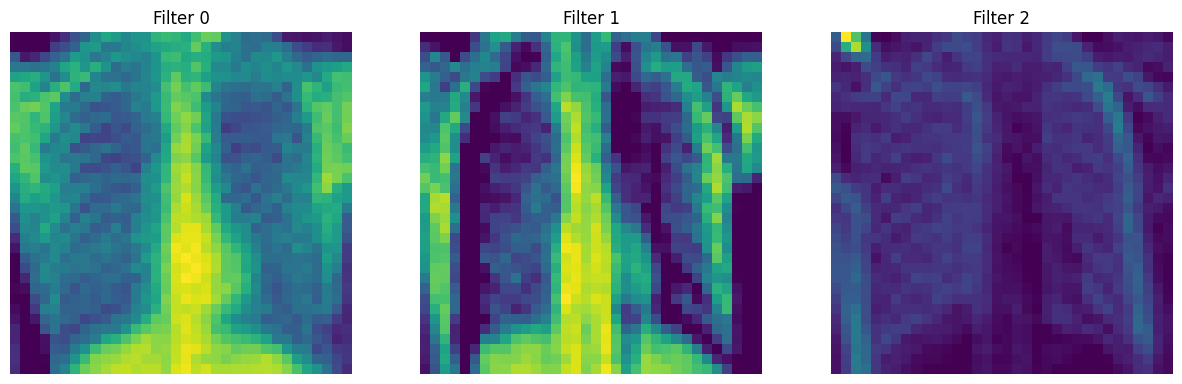

In [20]:

from tensorflow.keras.models import Model

# Extracting the last convolutional layer
last_conv_layer = model.get_layer('conv2d_2')

# Creating a model that maps the input image to the last conv layer
activation_model = Model(inputs=model.input, outputs=last_conv_layer.output)

# Choose a sample image path for visualization
sample_img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0005-0001.jpeg'
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=(150, 150))
sample_img_array = tf.keras.preprocessing.image.img_to_array(sample_img)
sample_img_array = tf.expand_dims(sample_img_array, 0)

# Getting the activation maps
activations = activation_model.predict(sample_img_array)

# Choosing the last convolutional layer's filters
filter_indices = [0, 1, 2]

# Visualizing the most activating regions
plt.figure(figsize=(15, 6))
for i in range(len(filter_indices)):
    plt.subplot(1, len(filter_indices), i + 1)
    plt.imshow(activations[0, :, :, filter_indices[i]], cmap='viridis')
    plt.title(f'Filter {filter_indices[i]}')
    plt.axis('off')

plt.show()


**What are the most activating regions in a Pneumonia infected image as per the CNN model?**


1/1 [==============================] - 0s 57ms/step


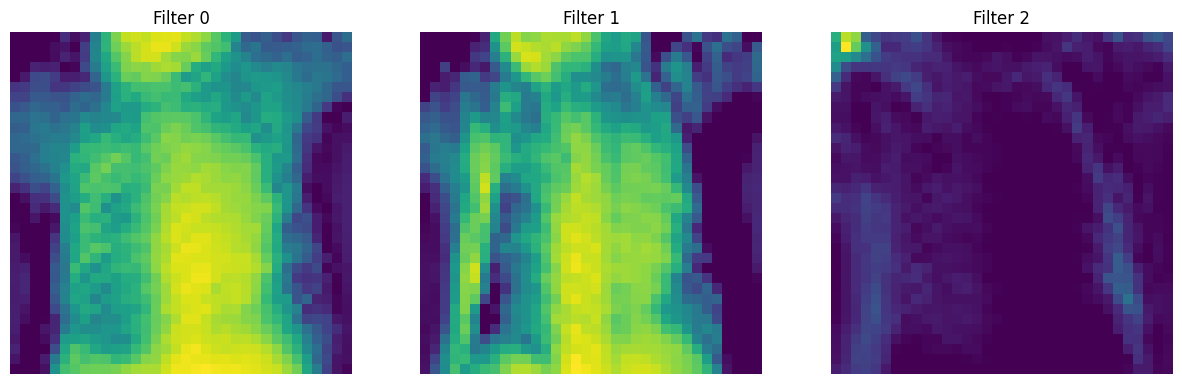

In [21]:
from tensorflow.keras.models import Model

# Extracting the last convolutional layer
last_conv_layer = model.get_layer('conv2d_2')

# Creating a model that maps the input image to the last conv layer
activation_model = Model(inputs=model.input, outputs=last_conv_layer.output)

# Choose a sample image path for visualization
sample_img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg'
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=(150, 150))
sample_img_array = tf.keras.preprocessing.image.img_to_array(sample_img)
sample_img_array = tf.expand_dims(sample_img_array, 0)

# Getting the activation maps
activations = activation_model.predict(sample_img_array)

# Choosing the last convolutional layer's filters
filter_indices = [0, 1, 2]

# Visualizing the most activating regions
plt.figure(figsize=(15, 6))
for i in range(len(filter_indices)):
    plt.subplot(1, len(filter_indices), i + 1)
    plt.imshow(activations[0, :, :, filter_indices[i]], cmap='viridis')
    plt.title(f'Filter {filter_indices[i]}')
    plt.axis('off')

plt.show()

**How to generate a ROC curve and calculate AUC for the CNN model?**

20/20 [==============================] - 5s 228ms/step


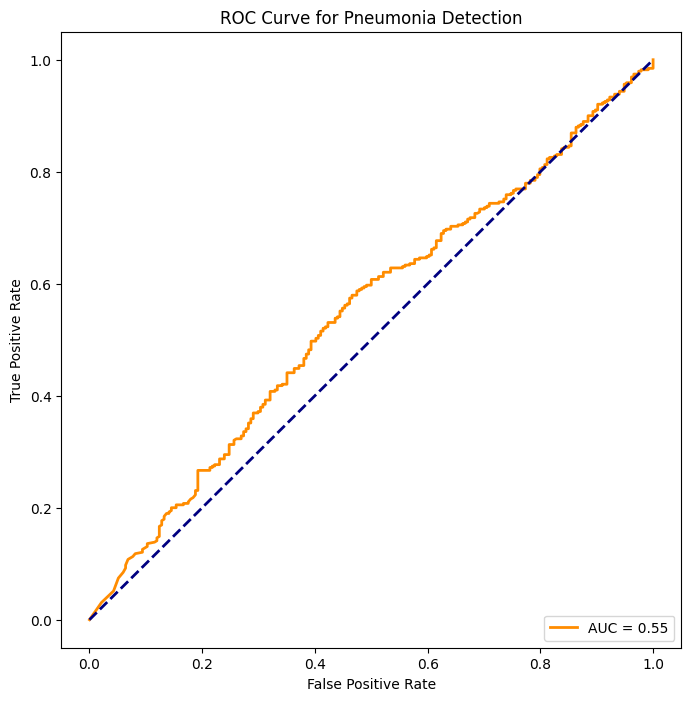

In [22]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
predicted_probabilities = model.predict(test_generator)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_generator.classes, predicted_probabilities)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Pneumonia Detection')
plt.legend(loc='lower right')
plt.show()


**How to visualize the distribution of predicted probabilities for Pneumonia?**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


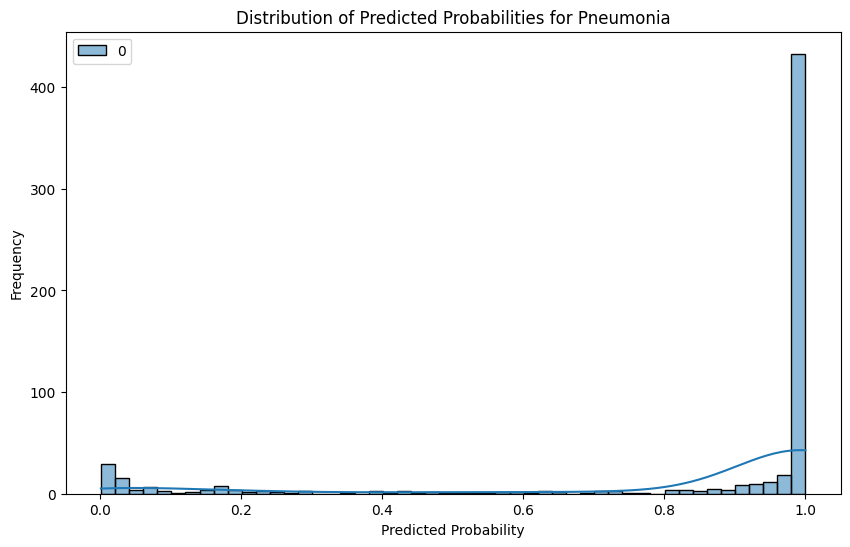

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(predicted_probabilities, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities for Pneumonia')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


**What is the sensitivity and specificity of the CNN model for Pneumonia detection?**

In [24]:
# Question 20: Calculating sensitivity and specificity
threshold = 0.5  # Choose an appropriate threshold

# Convert probabilities to binary predictions based on the threshold
binary_predictions = (predicted_probabilities > threshold).astype(int).flatten()

# Calculate confusion matrix
conf_matrix_threshold = confusion_matrix(test_generator.classes, binary_predictions)

# Calculate sensitivity and specificity
sensitivity = conf_matrix_threshold[1, 1] / (conf_matrix_threshold[1, 1] + conf_matrix_threshold[1, 0])
specificity = conf_matrix_threshold[0, 0] / (conf_matrix_threshold[0, 0] + conf_matrix_threshold[0, 1])

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


Sensitivity (True Positive Rate): 0.84
Specificity (True Negative Rate): 0.16


**How to visualize the confusion matrix for different probability thresholds?**

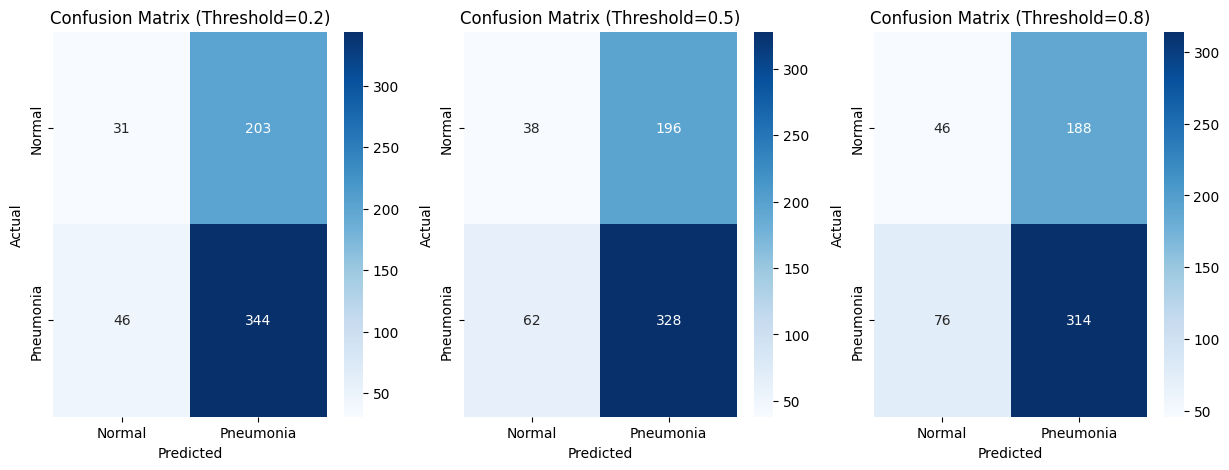

In [25]:
# Question 21: Visualizing confusion matrix for different thresholds
thresholds = [0.2, 0.5, 0.8]  # Choose different thresholds

plt.figure(figsize=(15, 5))
for i, threshold in enumerate(thresholds):
    binary_predictions = (predicted_probabilities > threshold).astype(int).flatten()
    conf_matrix = confusion_matrix(test_generator.classes, binary_predictions)

    plt.subplot(1, len(thresholds), i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
    plt.title(f'Confusion Matrix (Threshold={threshold})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.show()


**What is the precision-recall curve for Pneumonia detection?**

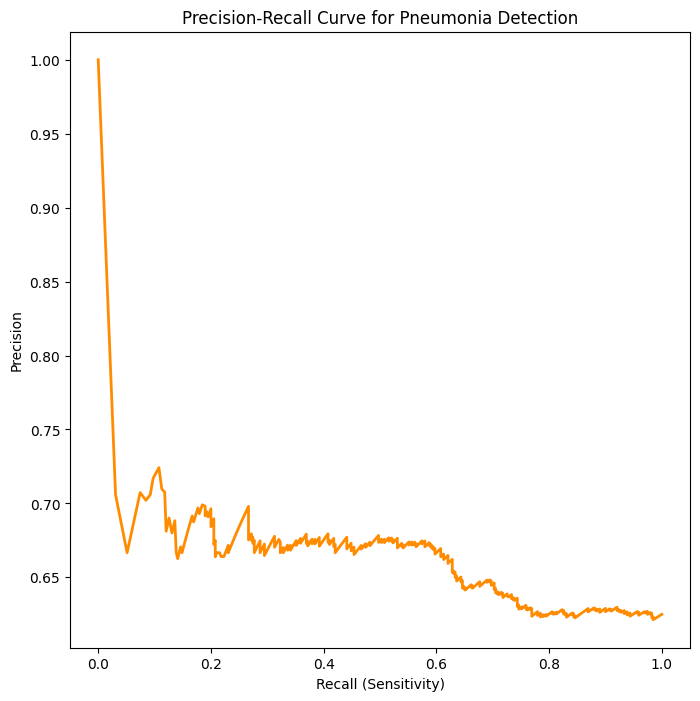

In [26]:
# Question 22: Generating precision-recall curve
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(test_generator.classes, predicted_probabilities)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Pneumonia Detection')
plt.show()


**What is the F1 score for Pneumonia detection?**

In [27]:
# Question 23: Calculating F1 score
from sklearn.metrics import f1_score

# Choose an appropriate threshold
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
binary_predictions = (predicted_probabilities > threshold).astype(int).flatten()

# Calculate F1 score
f1 = f1_score(test_generator.classes, binary_predictions)

print(f"F1 Score: {f1:.2f}")


F1 Score: 0.72


**Some Serious EDA**

In [28]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load image data from a given folder
def load_data(folder_path):
    data = []
    labels = []
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        for image in os.listdir(category_path):
            image_path = os.path.join(category_path, image)
            data.append(image_path)
            labels.append(category)
    return pd.DataFrame({"image_path": data, "label": labels})

# Load training, testing, and validation data
train_data = load_data(os.path.join(main_path, "train"))
test_data = load_data(os.path.join(main_path, "test"))
val_data = load_data(os.path.join(main_path, "val"))

**What is the structure of the dataset, and how many samples are in each category?**

In [29]:
# Display basic information about the dataset
print("Training Data Summary:")
print(train_data.info())
print("\nDistribution of Classes:")
print(train_data['label'].value_counts())


Training Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5216 non-null   object
 1   label       5216 non-null   object
dtypes: object(2)
memory usage: 81.6+ KB
None

Distribution of Classes:
label
PNEUMONIA    3875
NORMAL       1341
Name: count, dtype: int64


**What does a sample image look like in each category?**

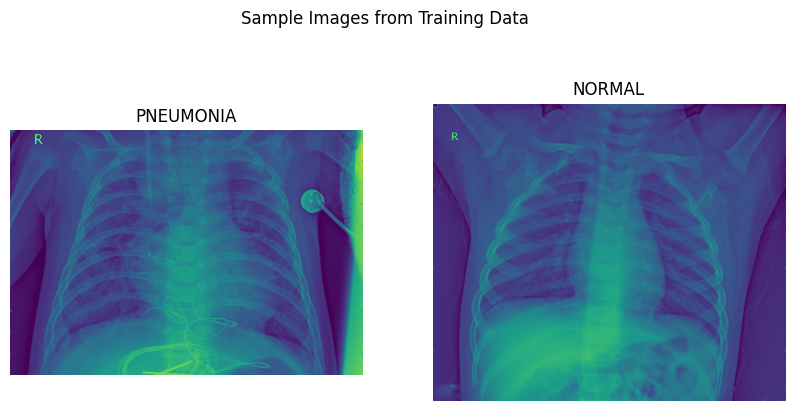

In [30]:
# Display sample images from each category
def display_sample_images(data, title):
    plt.figure(figsize=(10, 5))
    for i, category in enumerate(data['label'].unique(), 1):
        plt.subplot(1, 2, i)
        sample_image_path = data[data['label'] == category]['image_path'].iloc[0]
        sample_image = Image.open(sample_image_path)
        plt.imshow(sample_image)
        plt.title(category)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display sample images from training data
display_sample_images(train_data, "Sample Images from Training Data")

# Repeat the above code for test and validation datasets if needed.


**What is the distribution of image sizes in the dataset?**

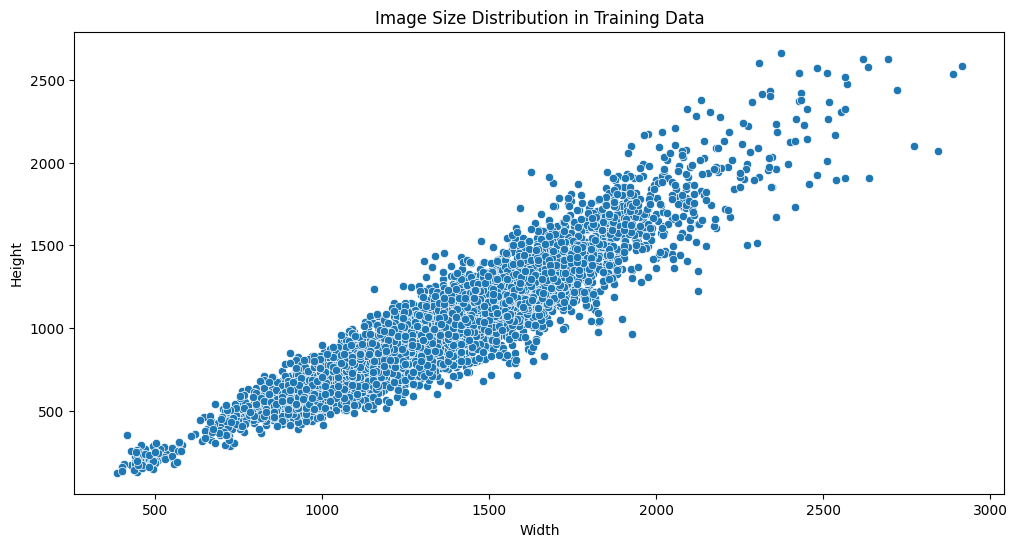

In [31]:
# Display the distribution of image sizes
def plot_image_size_distribution(data, title):
    sizes = []
    for path in data['image_path']:
        img = Image.open(path)
        sizes.append(img.size)

    sizes_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Width', y='Height', data=sizes_df)
    plt.title(title)
    plt.show()

# Plot image size distribution for training data
plot_image_size_distribution(train_data, "Image Size Distribution in Training Data")


**What is the distribution of labels in the test and validation datasets?**

In [32]:
# Display distribution of labels in the test dataset
print("Distribution of Classes in Test Data:")
print(test_data['label'].value_counts())

# Display distribution of labels in the validation dataset
print("\nDistribution of Classes in Validation Data:")
print(val_data['label'].value_counts())


Distribution of Classes in Test Data:
label
PNEUMONIA    390
NORMAL       234
Name: count, dtype: int64

Distribution of Classes in Validation Data:
label
PNEUMONIA    8
NORMAL       8
Name: count, dtype: int64


**What is the distribution of image formats in the dataset?**

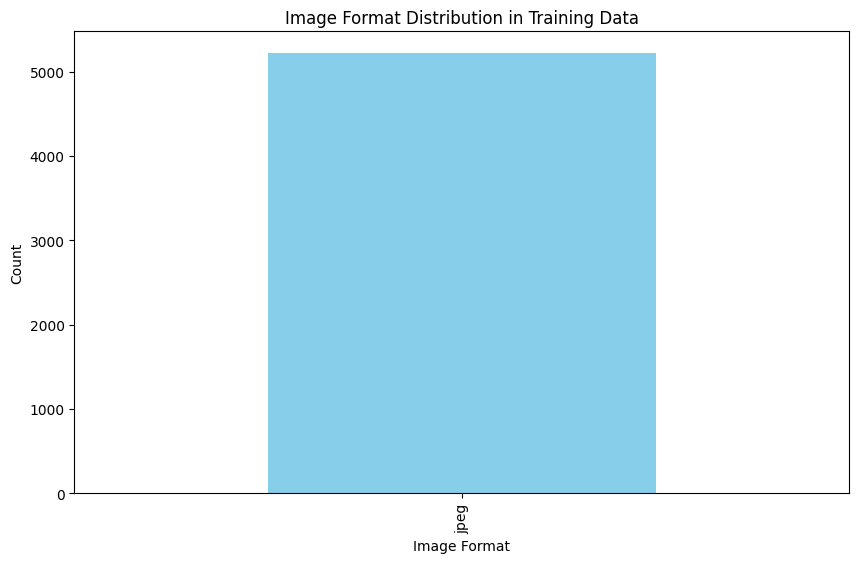

In [33]:
# Display the distribution of image formats
def plot_image_format_distribution(data, title):
    formats = [path.split('.')[-1] for path in data['image_path']]
    format_counts = pd.Series(formats).value_counts()

    plt.figure(figsize=(10, 6))
    format_counts.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel("Image Format")
    plt.ylabel("Count")
    plt.show()

# Plot image format distribution for training data
plot_image_format_distribution(train_data, "Image Format Distribution in Training Data")


**Is there any class imbalance in the dataset?**

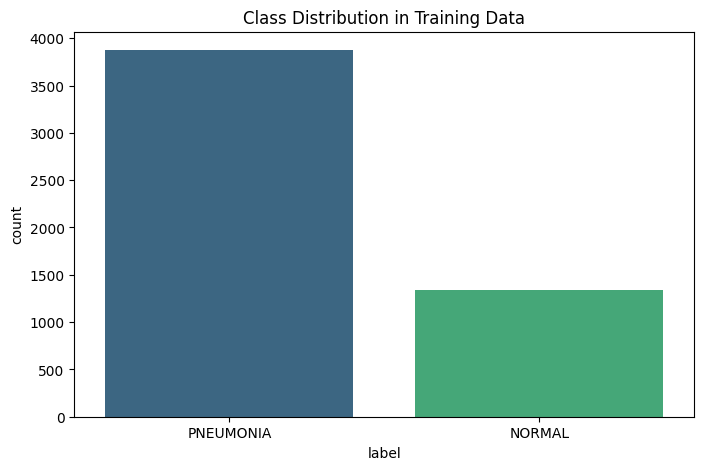

In [34]:
# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=train_data, palette='viridis')
plt.title("Class Distribution in Training Data")
plt.show()


**What is the correlation between image size and class?**

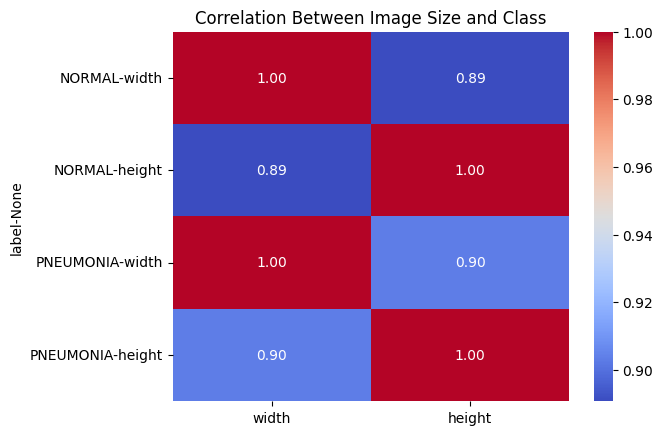

In [35]:
# Add image size columns to the training data
train_data['width'] = train_data['image_path'].apply(lambda x: Image.open(x).size[0])
train_data['height'] = train_data['image_path'].apply(lambda x: Image.open(x).size[1])

# Calculate correlation between image size and class
correlation_matrix = train_data[['width', 'height', 'label']].groupby('label').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Image Size and Class")
plt.show()


**Is there a relationship between image size and class?**

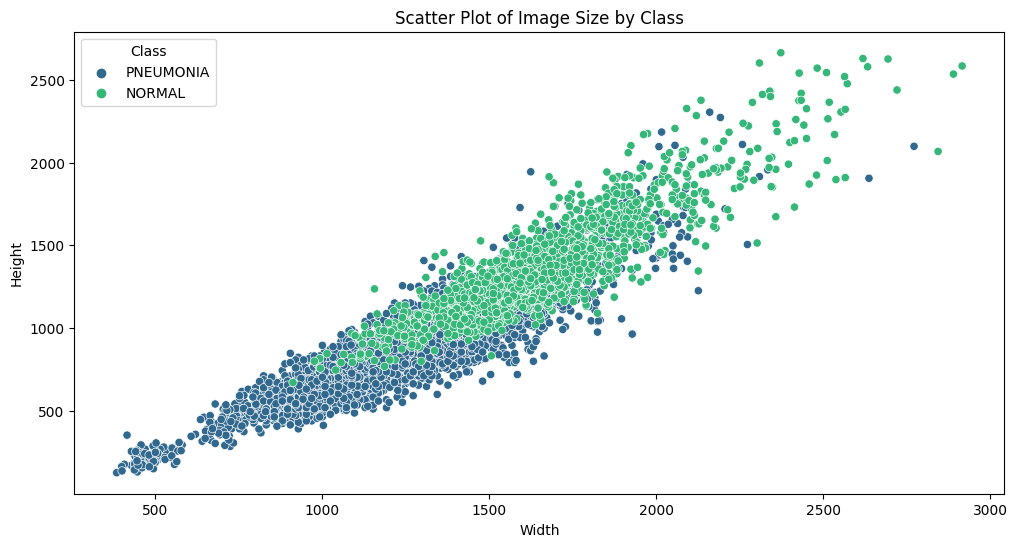

In [36]:
# Scatter plot of image size by class
plt.figure(figsize=(12, 6))
sns.scatterplot(x='width', y='height', hue='label', data=train_data, palette='viridis')
plt.title("Scatter Plot of Image Size by Class")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(title="Class")
plt.show()


**What is the distribution of aspect ratios in the dataset?**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


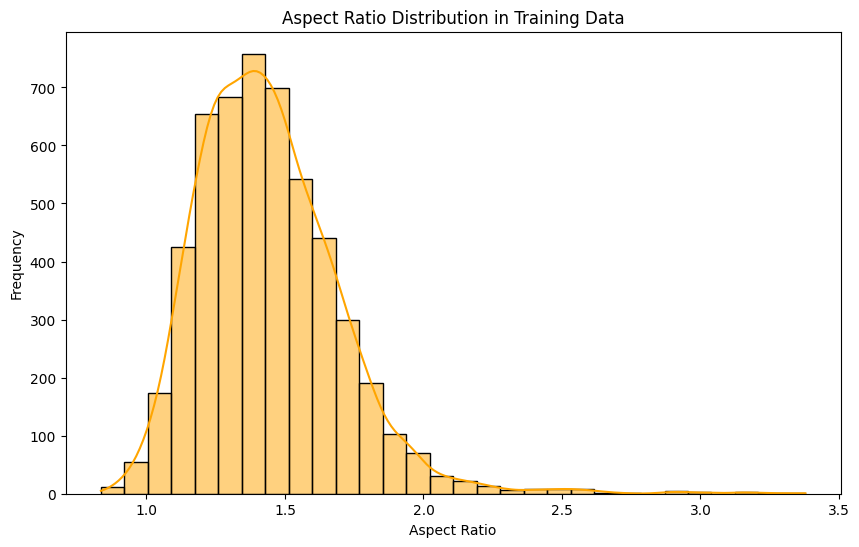

In [37]:
# Calculate and plot aspect ratio distribution
train_data['aspect_ratio'] = train_data['width'] / train_data['height']
plt.figure(figsize=(10, 6))
sns.histplot(train_data['aspect_ratio'], bins=30, kde=True, color='orange')
plt.title("Aspect Ratio Distribution in Training Data")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.show()


**What is the distribution of image sizes for each class?**

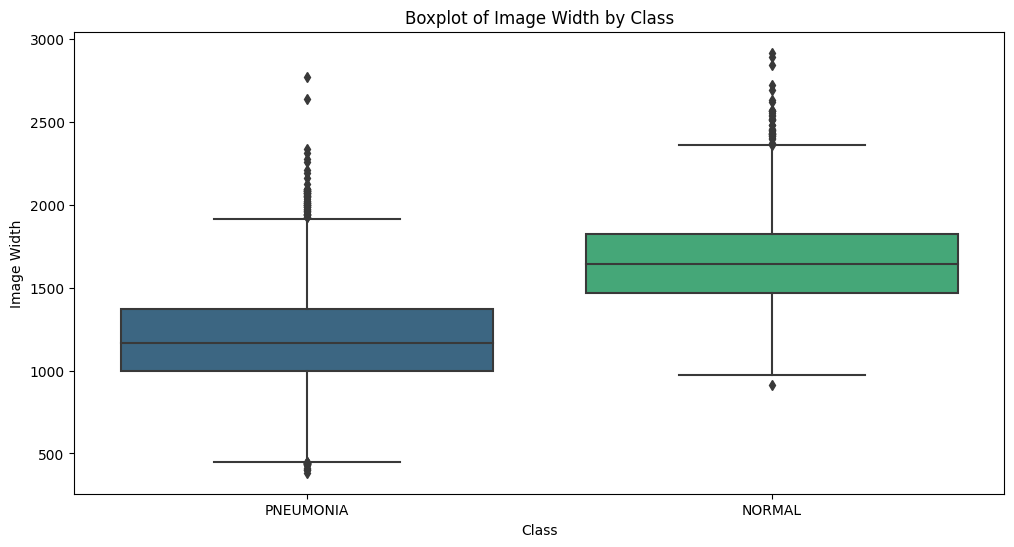

In [38]:
# Boxplot of image sizes by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='width', data=train_data, palette='viridis')
plt.title("Boxplot of Image Width by Class")
plt.xlabel("Class")
plt.ylabel("Image Width")
plt.show()

# Repeat the above code for image height if needed.
